# **US Stock Initial Lab**

To extract financial data like historical share price and quarterly revenue reportings from various sources, this lab has been created. After collecting this data, low-level and advance visualization are addressed by making interactive charts and different chart types. The stocks I will work with are Tesla.

In this lab, I'm going to use Pandas and yfinance (yahoo finance) libraries. yfinance offers a threaded and Pythonic way to download market data from Yahoo. Let's use it.

**Step 1: Installing dependencies**

In [1]:
!pip install -q -U watermark

     |████████████████████████████████| 1.6 MB 35.6 MB/s 


In [2]:
%reload_ext watermark
%watermark -v -p pandas

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.9.0

yfinance: not installed
pandas  : 1.3.5



In [4]:
!pip install yfinance==0.1.67

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Step 2: importing libs**

In [5]:
import yfinance as yf
import pandas as pd

**Step 3: Using the yfinance Library to Extract Stock Data**
Using the **Ticker** module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Tesla and the ticker symbol is **TSLA**.

In [34]:
TESLA = yf.Ticker('TSLA')

**Step 3: Stock Info**
Using the attribute info we can extract information about the stock as a Python dictionary.

In [35]:
TESLA_info = TESLA.info
TESLA_info

{'zip': '78725',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 99290,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warrantie

We can get the **'country'** using the key country

In [36]:
TESLA_info['country']

'United States'

We can get the **'total cash'** using the key totalCash

In [37]:
TESLA_info['totalCash']

18915000320

**Step 4: Extracting Share Price**
A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the **history()** method we can get the share price of the stock over a certain period of time. Using the **period** parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [38]:
TESLA_share_price_data= TESLA.history(period= 'max')

The format that the **data** is returned in is a **Pandas DataFrame**. With the **Date** as the index the share **Open, High, Low, Close, Volume, and Stock Splits** are given for each day.

In [39]:
TESLA_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [45]:
TESLA_share_price_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3068.000000,3068.000000,3068.000000,3068.000000,3.068000e+03,3068.0,3068.000000
mean,54.718161,55.943503,53.379899,54.693276,9.356913e+07,0.0,0.002608
std,93.087553,95.233898,90.668179,92.977950,8.252606e+07,0.0,0.105257
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,8.081666,8.279167,7.933333,8.087500,4.124100e+07,0.0,0.000000
50%,15.925000,16.210334,15.664000,15.933000,7.558200e+07,0.0,0.000000
75%,23.528500,23.833167,23.135000,23.478834,1.176285e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


We can reset the index of the DataFrame with the **reset_index** function. We also set the **inplace** paramter to **True** so the change takes place to the DataFrame itself.

In [41]:
TESLA_share_price_data.reset_index(inplace=True)

We can plot the Open price against the Date:

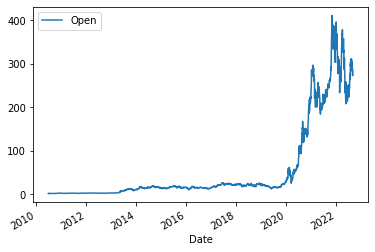

In [42]:
TESLA_share_price_data.plot(x="Date", y="Open")

**Step 5: Extracting Dividends**

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable **dividends** we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [43]:
TESLA.dividends

Series([], Name: Dividends, dtype: int64)

We can plot the dividends overtime:

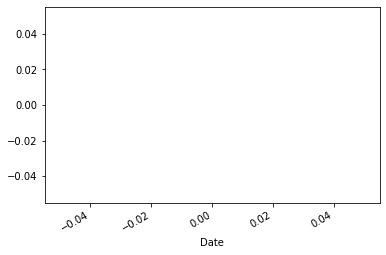

In [44]:
TESLA.dividends.plot()

**Step 6: Visualizing the data in candle chart using Plotly lib**

We use Plotly because it provides a high-level, declarative charting library running in browser using a javascript lib. Rangeslider is used in this example.

In [47]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import plotly.graph_objects as go

In [50]:
df = TESLA_share_price_data

In [51]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

**Step 7: More advanced visualization with interactive selection**

In [54]:
# load default data
df = TESLA.history(period= 'max')
df.reset_index(inplace=True)
# Create figure
fig2 = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# Set title
fig2.update_layout(title_text="Candle Stick chart with range slider and selectors")

# Add range slider
fig2.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig2.show()